# Pymaceuticals Inc.
---

### Analysis

- Overall it looks like the drug of interest Capomulin was one of the best treatment options compared to other regimens. The mean tumar volume for mice treated with Capomulin was the second smallest in size, and only Ramicane was better. When we looked at a specific mouse in ID l509, we can see that over a time period of 45 days, its tumor size decreased more and more.
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results,mouse_metadata,how = 'left', on='Mouse ID')

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
combined_data_df['Mouse ID'].nunique()

249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_data_df[combined_data_df['Mouse ID'] != 'g989']
clean_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice in the clean DataFrame.
clean_mice_df['Mouse ID'].nunique()

248

## Summary Statistics

In [51]:
import numpy as np

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg_mean = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
drug_reg_median = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
drug_reg_std = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
drug_reg_var = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
drug_reg_sem = clean_mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_drug_reg = pd.DataFrame({'Mean Tumor Volume': drug_reg_mean,
                                 'Median Tumor Volume': drug_reg_median,
                                 'Tumor Volume Variance': drug_reg_var,
                                 'Tumor Volume Std. Dev.': drug_reg_std,
                                 'Tumor Volume Std. Err.': drug_reg_sem})
summary_drug_reg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Ketapril'),
 Text(3, 0, 'Naftisol'),
 Text(4, 0, 'Zoniferol'),
 Text(5, 0, 'Stelasyn'),
 Text(6, 0, 'Placebo'),
 Text(7, 0, 'Infubinol'),
 Text(8, 0, 'Ceftamin'),
 Text(9, 0, 'Propriva')]

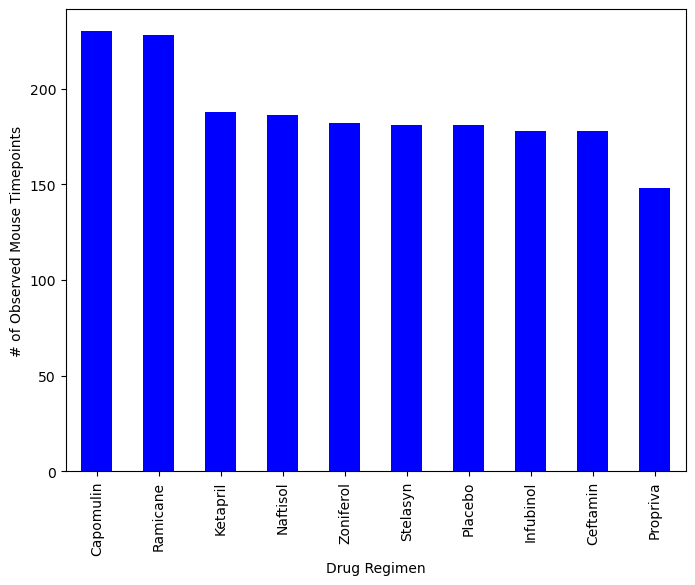

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_data = clean_mice_df['Drug Regimen'].value_counts()

drug_reg_plot = drug_data.plot(kind = 'bar', facecolor = "blue", figsize=(8,6),
                   xlabel="Drug Regimen",ylabel = '# of Observed Mouse Timepoints')

xticklabels = drug_data.index
drug_reg_plot.set_xticklabels(xticklabels)

In [75]:
drug_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

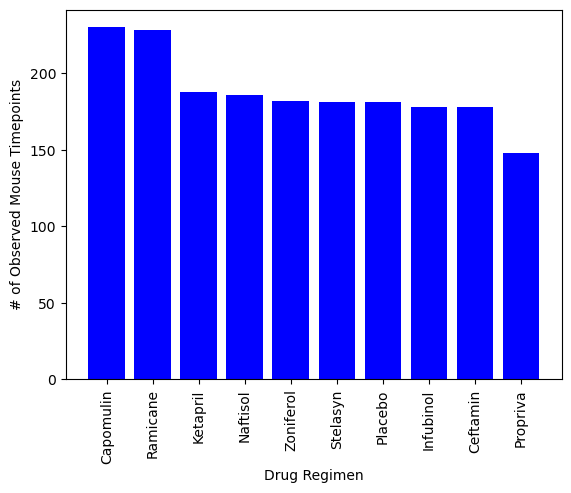

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol',
                'Stelasyn','Placebo','Infubinol','Ceftamin','Propriva',]
drug_counts = [230,228,188,186,182,181,181,178,178,148]
x_axis = np.arange(len(drug_counts))
plt.bar(x_axis,drug_counts, color = "b")
tick_locations = [t for t in x_axis]
plt.xticks(tick_locations,drug_regimen,rotation = 'vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

(-1.0999999297639522,
 1.0999999966554264,
 -1.099999910075619,
 1.0999999844482926)

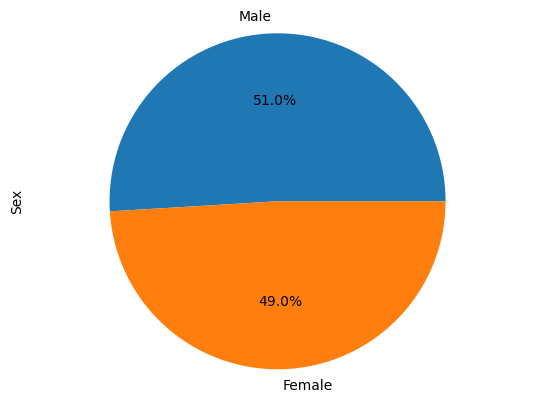

In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_mice_df['Sex'].value_counts()
mice_pie = mice_sex.plot(kind ='pie', y = 'Sex',autopct='%1.1f%%')
mice_pie.set_ylabel('Sex')
plt.axis('equal')

In [94]:
mice_sex

Sex
Male      958
Female    922
Name: count, dtype: int64

Text(0, 0.5, 'Sex')

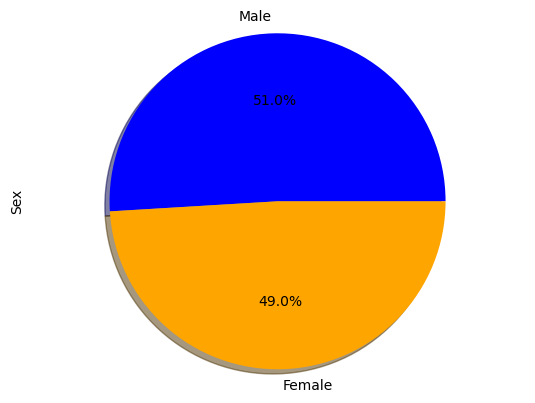

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ['Male','Female']
pie_counts = [958,922]
colors = ['blue','orange']

plt.pie(pie_counts,labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True)
plt.axis('equal')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mice_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge = pd.merge(max_timepoint, clean_mice_df, on=['Mouse ID', 'Timepoint'], how='left')


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = max_merge.loc[max_merge['Drug Regimen'] == t, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(treatment_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{t} Potential Outliers: {outliers}")

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final tumor Volume (mm3)')

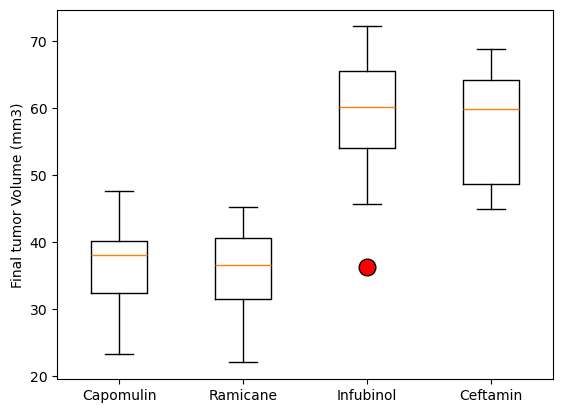

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments,flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
plt.ylabel('Final tumor Volume (mm3)')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

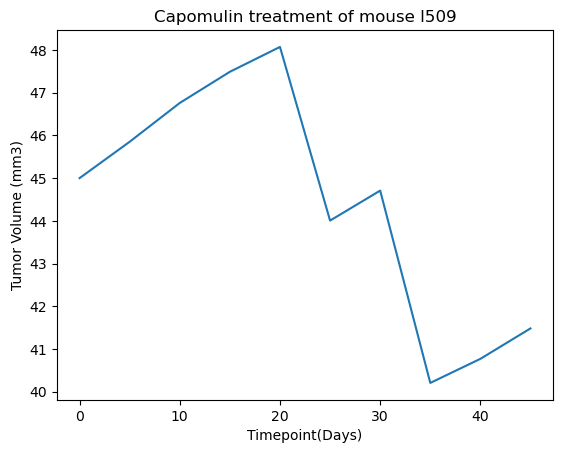

In [136]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_mice_df[(clean_mice_df['Mouse ID'] == 'l509') 
                           & (clean_mice_df['Drug Regimen'] == 'Capomulin')]

tum_volume_l509 = mouse_l509['Tumor Volume (mm3)']
x_labels = mouse_l509['Timepoint']
y_axis = [y for y in tum_volume_l509]
x_axis = [x for x in x_labels]


plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin treatment of mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

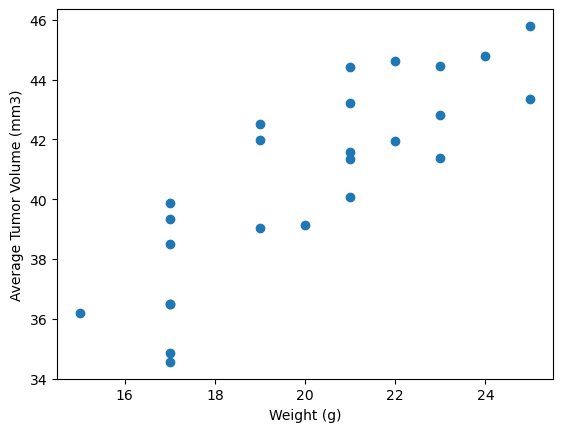

In [159]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_mice_df[clean_mice_df["Drug Regimen"] == "Capomulin"]
grouped_weight = capomulin_df.groupby('Mouse ID')[['Tumor Volume (mm3)',"Weight (g)"]].mean()

plt.scatter(grouped_weight['Weight (g)'],grouped_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [161]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


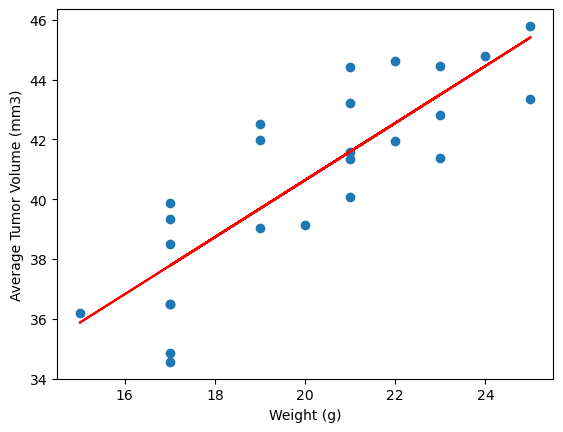

In [164]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(grouped_weight['Weight (g)'],grouped_weight['Tumor Volume (mm3)'])[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_weight['Weight (g)'], grouped_weight['Tumor Volume (mm3)'])
regress_values = grouped_weight['Weight (g)'] * slope + intercept
plt.scatter(grouped_weight['Weight (g)'],grouped_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(grouped_weight['Weight (g)'],regress_values,"r-")